## QUICKSTART

In [5]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [6]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.6%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



119.3%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [7]:
batch_size = 64

#Create data loaders.
train_loader = DataLoader(training_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_loader:
    print("Shape of X: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [24]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [26]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) #dataset's size
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y  = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')


In [27]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) #num_batches
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')


In [28]:
epochs = 5
for t in range(epochs):
    print(f'Epoch {t+1}\n---------------------')
    train(train_loader, model, loss_fn , optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
---------------------
loss: 2.312349 [    0/60000]
loss: 2.295511 [ 6400/60000]
loss: 2.279480 [12800/60000]
loss: 2.265812 [19200/60000]
loss: 2.250063 [25600/60000]
loss: 2.216735 [32000/60000]
loss: 2.218797 [38400/60000]
loss: 2.183095 [44800/60000]
loss: 2.185128 [51200/60000]
loss: 2.150813 [57600/60000]
Test Error: 
 Accuracy: 51.1%, Avg loss: 2.146841 

Epoch 2
---------------------
loss: 2.160218 [    0/60000]
loss: 2.146248 [ 6400/60000]
loss: 2.095606 [12800/60000]
loss: 2.106461 [19200/60000]
loss: 2.055187 [25600/60000]
loss: 1.997883 [32000/60000]
loss: 2.011998 [38400/60000]
loss: 1.938118 [44800/60000]
loss: 1.947298 [51200/60000]
loss: 1.863931 [57600/60000]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.873350 

Epoch 3
---------------------
loss: 1.908638 [    0/60000]
loss: 1.874515 [ 6400/60000]
loss: 1.771200 [12800/60000]
loss: 1.802149 [19200/60000]
loss: 1.692675 [25600/60000]
loss: 1.653376 [32000/60000]
loss: 1.650335 [38400/60000]
loss: 1.565078 [44800/6

In [29]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [30]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [36]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x = test_data[0][0] #1x28x28
y = test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
print(y.shape)

Predicted: "Ankle boot", Actual: "Ankle boot"


## TENSORS

In [46]:
import torch
import numpy as np

In [48]:
#initializing a Tensor

#Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

#from Numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#from another tensor
x_ones = torch.ones_like(x_data)
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.9180, 0.2444],
        [0.9509, 0.7375]])


In [52]:
shape = (2,3) #tuple
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape) #torch.zeros(2,3)해도 됨.

print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.4865, 0.7724, 0.2227],
        [0.3716, 0.0967, 0.5055]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [53]:
#Attributes of a Tensor

tensor = torch.rand(3,4) #shape=(3,4)

print(tensor.shape)
print(tensor.dtype) #datatype
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


In [54]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [56]:
#standard numpy-like indexing and slicing

tensor = torch.ones(4, 4)
print(tensor[0]) #first row
print(tensor[:,0]) #first column
print(tensor[:,-1]) #last column

tensor[:,1] = 0
print(tensor)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [58]:
#joining tensors

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1) #(4, 4*3)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [59]:
#Arithmetric operations

#This computes matrix multipliation between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

#This computes the element-wise product. z1, z2, z3, will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [60]:
#single-element tensors

agg = tensor.sum()
print(agg)
agg_item = agg.item() #convert single-element tensor into python numerical value
print(agg_item, type(agg_item)) 

tensor(12.)
12.0 <class 'float'>


In [61]:
#In-place operations
#In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.

print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [62]:
#Bridge with Numpy

#tensor to numpy array
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [63]:
#A change in the tensor reflects in the NumPy array.

t.add_(1)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [64]:
#numpy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## DATASETS & DATALOADERS

In [65]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [66]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

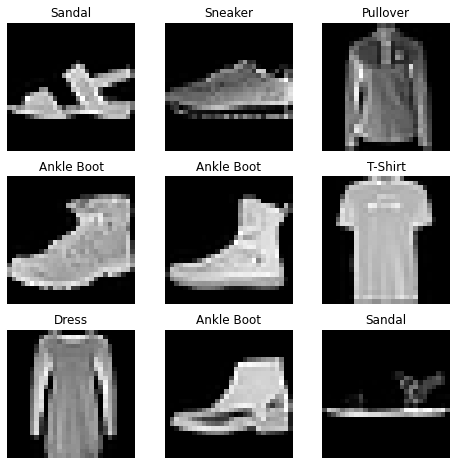

In [72]:
#Iterating and Visualizing the Dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [74]:
#Creating a Custom Dataset for your files

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [75]:
#Preparing your data for training with DataLoaders

from torch.utils.data import DataLoader

train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)
    

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


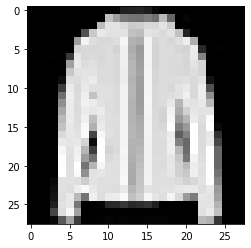

Label: 4


In [76]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## TRANSFORMS

In [77]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [78]:
X, y = ds[0]
print(y)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


## BUILD THE NEURAL NETWORK

In [79]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [80]:
#get device for training

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [81]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [82]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [85]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(dim=1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([8], device='cuda:0')


In [88]:
#Model Layer

input_image = torch.rand(3, 28, 28)
print(input_image.size()) #input_image.shape

torch.Size([3, 28, 28])


In [89]:
#nn.flatten

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [91]:
#nn.Linear

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [92]:
#nn.ReLU

print(f'Before ReLU: {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')

Before ReLU: tensor([[ 0.1444, -0.0902,  0.2332,  0.1707, -0.0084,  0.1291,  0.0561,  0.1088,
         -0.2433,  0.0797,  0.2774,  0.1349, -0.3878,  0.0555, -0.3535,  0.1815,
          0.1567, -0.5063,  0.0633, -0.2023],
        [ 0.0601, -0.0408,  0.4553,  0.0345, -0.1329,  0.1380,  0.1110,  0.4524,
          0.1129,  0.0458,  0.0820, -0.3286, -0.4594, -0.3304, -0.3472, -0.4533,
          0.1914, -0.1957, -0.2688, -0.0528],
        [ 0.2888, -0.1292,  0.5157,  0.1389, -0.2635,  0.0891,  0.2922,  0.3085,
          0.2931, -0.0168,  0.0272, -0.0465, -0.4188, -0.3965, -0.2496, -0.1878,
          0.0044, -0.7833, -0.2897,  0.0432]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1444, 0.0000, 0.2332, 0.1707, 0.0000, 0.1291, 0.0561, 0.1088, 0.0000,
         0.0797, 0.2774, 0.1349, 0.0000, 0.0555, 0.0000, 0.1815, 0.1567, 0.0000,
         0.0633, 0.0000],
        [0.0601, 0.0000, 0.4553, 0.0345, 0.0000, 0.1380, 0.1110, 0.4524, 0.1129,
         0.0458, 0.0820, 0.0000, 0.0000, 0.0000, 0.00

In [93]:
# nn.Sequential 

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [94]:
#nn.Softmax

softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)

In [95]:
#Model Parameters

print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 3.2101e-02,  3.4539e-02,  1.3252e-02,  ...,  8.3148e-05,
          4.8584e-03, -3.2833e-03],
        [-9.7594e-03,  1.4417e-02, -3.2976e-02,  ..., -2.4839e-02,
          1.6959e-02, -1.1282e-02]], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0257,  0.0095], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0313, -0.0354,  0.0124,  ..., -0.0150, -0.0175, -0.0261],
        [-0.0157, -0.0204,  0.0301,  ...,  0.

## AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD


In [97]:
import torch

x = torch.ones(5) #input
y = torch.zeros(3) #target
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [98]:
# reference to the backward propagation function is stored in grad_fn property of a tensor. 

print('Gradient function for z =', z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x00000162868138B0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000016286813A00>


In [99]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2426, 0.3035, 0.2761],
        [0.2426, 0.3035, 0.2761],
        [0.2426, 0.3035, 0.2761],
        [0.2426, 0.3035, 0.2761],
        [0.2426, 0.3035, 0.2761]])
tensor([0.2426, 0.3035, 0.2761])


In [100]:
# Disabling Gradient Tracking
# To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [101]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


## OPTIMIZING MODEL PARAMETERS

In [102]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [103]:
#Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [104]:
#loss function
loss_fn = nn.CrossEntropyLoss()

In [105]:
#Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [106]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [107]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307805  [    0/60000]
loss: 2.291766  [ 6400/60000]
loss: 2.267848  [12800/60000]
loss: 2.254846  [19200/60000]
loss: 2.243033  [25600/60000]
loss: 2.206446  [32000/60000]
loss: 2.221554  [38400/60000]
loss: 2.182954  [44800/60000]
loss: 2.169196  [51200/60000]
loss: 2.143104  [57600/60000]
Test Error: 
 Accuracy: 44.2%, Avg loss: 2.134328 

Epoch 2
-------------------------------
loss: 2.145715  [    0/60000]
loss: 2.136775  [ 6400/60000]
loss: 2.071595  [12800/60000]
loss: 2.085156  [19200/60000]
loss: 2.038058  [25600/60000]
loss: 1.970240  [32000/60000]
loss: 2.004468  [38400/60000]
loss: 1.916144  [44800/60000]
loss: 1.908630  [51200/60000]
loss: 1.850600  [57600/60000]
Test Error: 
 Accuracy: 53.9%, Avg loss: 1.842074 

Epoch 3
-------------------------------
loss: 1.873349  [    0/60000]
loss: 1.848145  [ 6400/60000]
loss: 1.720423  [12800/60000]
loss: 1.766458  [19200/60000]
loss: 1.673744  [25600/60000]
loss: 1.615971  [32000/600

## SAVE AND LOAD THE MODEL

In [ ]:
import torch
import torchvision.models as models

model = models.vgg16(pretrained=True)
torch.save(model.state.dict(), 'model_weights.pth') #saving model weight

In [ ]:
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

In [ ]:
torch.save(model, 'model.pth')#structure와 weights 모두 저장
model = torch.load('model.pth')